# Problem Statement:
    A cloth manufacturing company is interested to know about the segment       or attributes causes high sale. 
    Approach - A decision tree can be built with target variable Sale (we       will first convert it in categorical variable) & all other variable         will be independent in the analysis.  


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [7]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [5]:
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [6]:
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [16]:
df.drop(['Urban','US'],axis=1,inplace=True)

In [17]:
# seggregate the data into features and target
X = df.drop('ShelveLoc', axis=1)
y = df['ShelveLoc']

In [18]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
y_train.value_counts()

Medium    179
Bad        77
Good       64
Name: ShelveLoc, dtype: int64

In [20]:
y_test.value_counts()

Medium    40
Good      21
Bad       19
Name: ShelveLoc, dtype: int64

In [21]:
# create a decision tree classifier & fit the model on training dataset
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [27]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(400,300))
plot_tree(dtree, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True);

In [28]:
# predict on the train data & test data
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

In [29]:
pred_test

array(['Bad', 'Medium', 'Good', 'Medium', 'Good', 'Medium', 'Good', 'Bad',
       'Medium', 'Good', 'Medium', 'Medium', 'Good', 'Bad', 'Good',
       'Medium', 'Good', 'Good', 'Bad', 'Medium', 'Medium', 'Medium',
       'Bad', 'Bad', 'Medium', 'Medium', 'Medium', 'Bad', 'Medium', 'Bad',
       'Good', 'Good', 'Medium', 'Bad', 'Medium', 'Good', 'Medium',
       'Medium', 'Good', 'Bad', 'Medium', 'Medium', 'Medium', 'Good',
       'Good', 'Bad', 'Bad', 'Medium', 'Bad', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Good', 'Bad', 'Bad', 'Medium',
       'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Bad', 'Bad',
       'Medium', 'Good', 'Medium', 'Bad', 'Bad', 'Medium', 'Medium',
       'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Bad', 'Bad', 'Bad'],
      dtype=object)

In [30]:
pred_train

array(['Medium', 'Good', 'Bad', 'Good', 'Medium', 'Medium', 'Medium',
       'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Bad', 'Good', 'Medium', 'Medium', 'Bad', 'Bad', 'Bad', 'Medium',
       'Good', 'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Good',
       'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Bad', 'Bad',
       'Bad', 'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Good',
       'Good', 'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Good',
       'Bad', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Medium',
       'Bad', 'Medium', 'Bad', 'Good', 'Medium', 'Bad', 'Medium', 'Bad',
       'Bad', 'Medium', 'Medium', 'Bad', 'Good', 'Medium', 'Medium',
       'Medium', 'Good', 'Bad', 'Medium', 'Bad', 'Good', 'Good', 'Bad',
       'Medium', 'Bad', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Bad', 'Good', 'Bad', 'Medium', 'Medium', 'Good', 'Good', 'Bad',
       'Medium', 'Bad', 'Good', 'Good', 'Medium', 'Medium', 'Good',
    

<Figure size 2880x2160 with 0 Axes>

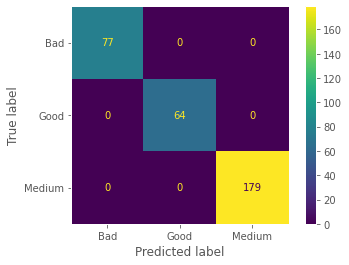

In [35]:
# plot confusion matrix for train data
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(40,30))
ConfusionMatrixDisplay.from_predictions(y_train, pred_train, display_labels=y.unique())
plt.grid(False);

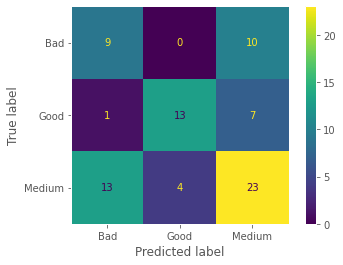

In [36]:
# plot confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=y.unique())
plt.grid(False);

In [37]:
acc_train = accuracy_score(y_train, pred_train)
acc_train

1.0

In [38]:
acc_test = accuracy_score(y_test, pred_test)
acc_test

0.5625

In [39]:
# create a fresh tree model with criterion as entropy & get predictions on train and test data
dtree_ent = DecisionTreeClassifier(criterion='entropy')
dtree_ent.fit(X_train, y_train)
pred_train_ent = dtree_ent.predict(X_train)
pred_test_ent = dtree_ent.predict(X_test)

In [40]:
acc_train_ent = accuracy_score(y_train, pred_train_ent)
acc_test_ent = accuracy_score(y_test, pred_test_ent)
acc_train_ent, acc_test_ent

(1.0, 0.575)

In [41]:
# decision tree for regression. import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [45]:
df.drop(['ShelveLoc'],axis=1,inplace=True)

In [48]:
# seggregate the data into features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

In [49]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# instantiate the decision tree regressor, fit on the training data and predict on train and test data
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
pred_train_reg = dtree_reg.predict(X_train)
pred_test_reg = dtree_reg.predict(X_test)

In [51]:
# create a dataframe of the first 10 predictions vs the actual values of the test data
pd.DataFrame({'Actual': y_test[:10], 'Predicted': pred_test_reg[:10]})

Actual  Predicted
209    3.02       8.41
280    2.86       6.62
33     8.77       9.43
210    4.36       6.42
93     8.86       8.80
84     2.23       3.89
329   11.27       8.01
94     8.39      11.96
266    9.10      10.07
126   11.27       7.74

In [52]:
# compute the r2 and rmse of the model predictions on train and test data
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, pred_train_reg)
r2_test = r2_score(y_test, pred_test_reg)
r2_train, r2_test

(1.0, 0.10888039993889109)

In [53]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_reg))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_reg))
rmse_train, rmse_test

(0.0, 2.969629606533448)